In [2]:
# Instalar as bibliotecas necessárias
!python3 -m pip install yfinance numpy pandas matplotlib seaborn scipy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
# Importando bibliotecas
import yfinance as yf
import pandas as pd

In [ ]:
import yfinance as yf

# Define o ticker do S&P 500
sp500 = yf.Ticker("^GSPC")

# Baixa o histórico mensal (intervalo = 1 mês)
dados_mensais = sp500.history(start="1996-01-01", end="2023-07-31", interval="1mo")

# Salva em CSV
dados_mensais.to_csv("sp500_mensal.csv")

print("Arquivo mensal salvo como sp500_mensal.csv")

Arquivo mensal salvo como sp500_mensal.csv


In [ ]:
import yfinance as yf

# Ticker do índice Bovespa
bvsp = yf.Ticker("^BVSP")

# Baixa o histórico mensal do Bovespa
dados_mensais = bvsp.history(start="1996-01-01", end="2023-07-31", interval="1mo")

# Salva em CSV
dados_mensais.to_csv("bvsp_mensal.csv")

print("Arquivo mensal salvo como bvsp_mensal.csv")

Arquivo mensal salvo como bvsp_mensal.csv


In [ ]:
import yfinance as yf

# Ticker do índice Nikkei 225
nikkei = yf.Ticker("^N225")

# Baixa o histórico mensal
dados_mensais = nikkei.history(start="1996-01-01", end="2007-12-31", interval="1mo")

# Salva em CSV
dados_mensais.to_csv("nikkei_mensal.csv")

print("Arquivo mensal salvo como nikkei_mensal.csv")

Arquivo mensal salvo como nikkei_mensal.csv


In [ ]:
# Reino Unido não dava a tabela para baixar

In [ ]:
# Ele só tem dado a partir de 02/07/1996, os outros tem de 01/01/1996
import yfinance as yf

# Ticker do índice Shanghai Composite
shanghai = yf.Ticker("000001.SS")

# Baixa o histórico mensal entre datas desejadas
dados_mensais = shanghai.history(start="1997-07-02", end="2007-12-31", interval="1mo")

# Salva em CSV
dados_mensais.to_csv("shanghai_composite_mensal.csv")

print("Arquivo mensal salvo como shanghai_composite_mensal.csv")

Arquivo mensal salvo como shanghai_composite_mensal.csv


In [ ]:
# O RTS foi baixado diretamente do site
https://www.investing.com/indices/rts-standard-historical-data

In [12]:
# Ele só tem a partir de 02/07/1997
import yfinance as yf

# Define o ticker do BSE Sensex
sensex = yf.Ticker("^BSESN")

# Baixa o histórico mensal
dados_mensais = sensex.history(start="1996-01-01", end="2025-07-31", interval="1mo")

# Salva em CSV
dados_mensais.to_csv("sensex_mensal.csv")

print("Arquivo mensal salvo como sensex_mensal.csv")

Arquivo mensal salvo como sensex_mensal.csv


In [4]:
import pandas as pd

# Lê os dados mensais de cada índice e armazena em variáveis separadas
sp500 = pd.read_csv("sp500_mensal.csv", parse_dates=["Date"], index_col="Date")
bvsp = pd.read_csv("bvsp_mensal.csv", parse_dates=["Date"], index_col="Date")
nikkei = pd.read_csv("nikkei_mensal.csv", parse_dates=["Date"], index_col="Date")
shanghai = pd.read_csv("shanghai_composite_mensal.csv", parse_dates=["Date"], index_col="Date")
sensex = pd.read_csv("sensex_mensal.csv", parse_dates=["Date"], index_col="Date")
rts = pd.read_csv("rts_mensal.csv", parse_dates=["Date"], index_col="Date")

# Visualização rápida de cada um (opcional)
for nome, df in zip(
    ["sp500", "bvsp", "nikkei", "shanghai", "sensex", "rts"],
    [sp500, bvsp, nikkei, shanghai, sensex, rts]
):
    print(f"\n===== {nome.upper()} =====")
    print(df.head())



===== SP500 =====
                                 Open        High         Low       Close  \
Date                                                                        
1996-01-01 00:00:00-05:00  615.929993  636.179993  597.289978  636.020020   
1996-02-01 00:00:00-05:00  636.020020  664.229980  633.710022  640.429993   
1996-03-01 00:00:00-05:00  640.429993  656.969971  627.630005  645.500000   
1996-04-01 00:00:00-05:00  645.500000  656.679993  624.140015  654.169983   
1996-05-01 00:00:00-04:00  654.169983  681.099976  630.070007  669.119995   

                               Volume  Dividends  Stock Splits  
Date                                                            
1996-01-01 00:00:00-05:00  9188050000        0.0           0.0  
1996-02-01 00:00:00-05:00  8749960000        0.0           0.0  
1996-03-01 00:00:00-05:00  8984200000        0.0           0.0  
1996-04-01 00:00:00-05:00  8875580000        0.0           0.0  
1996-05-01 00:00:00-04:00  8921140000        0.0   

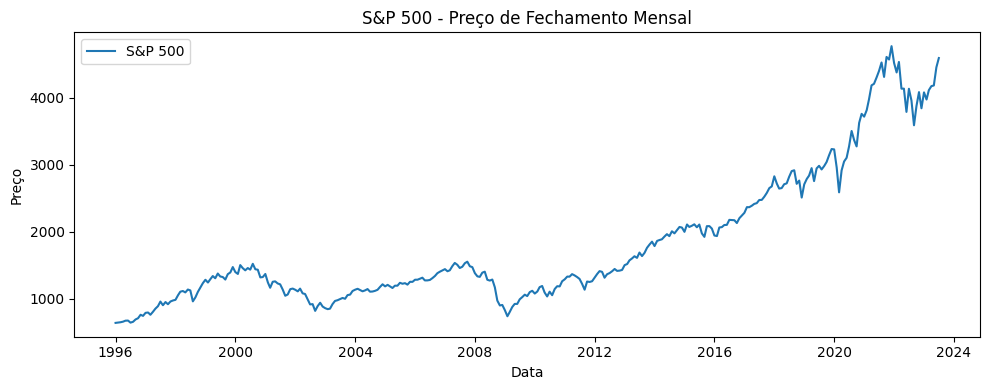

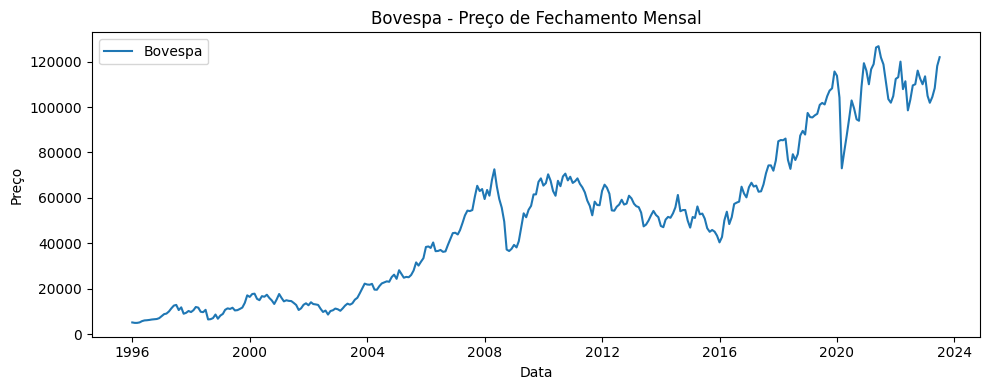

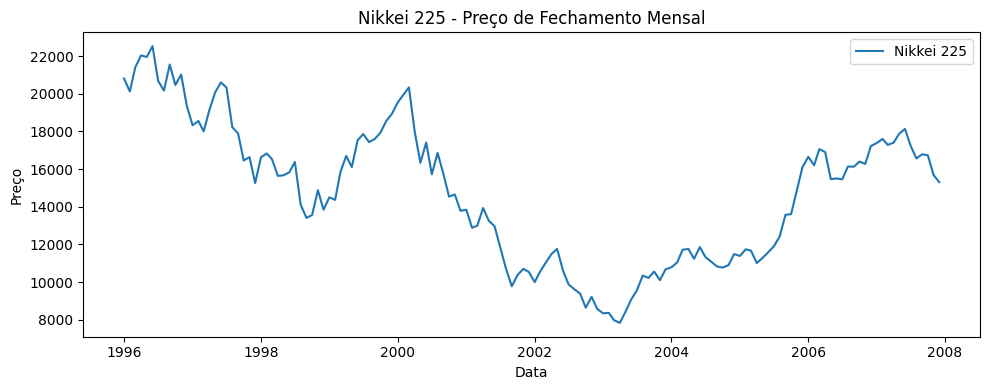

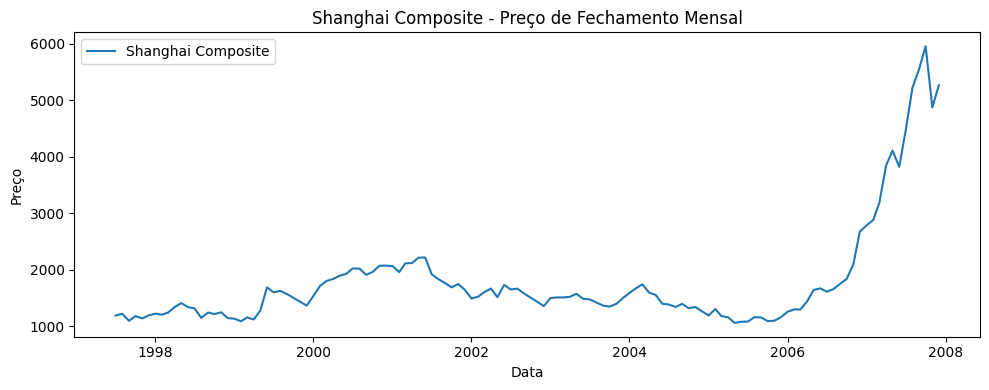

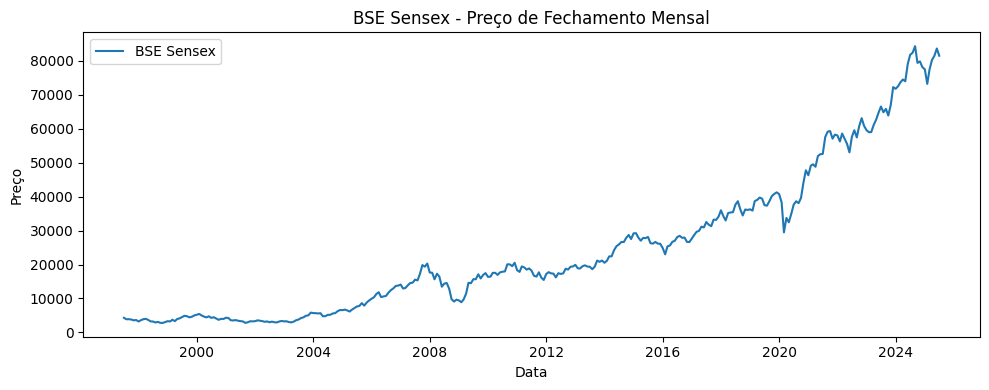

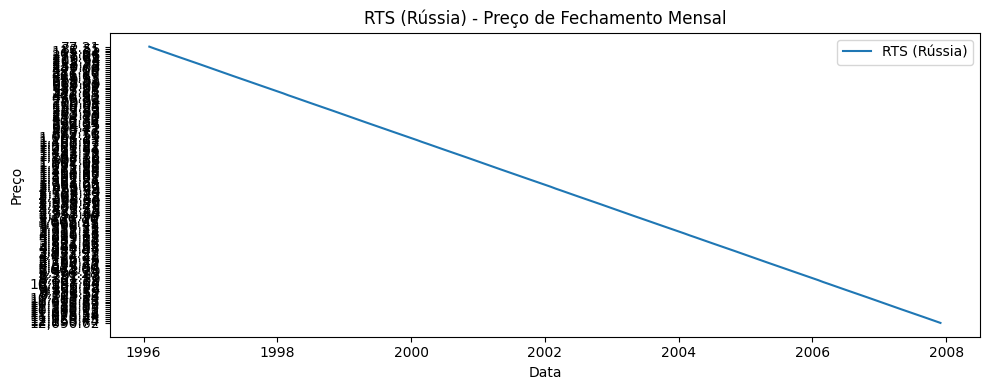

In [5]:
import matplotlib.pyplot as plt

# Lista de tuplas com nome e DataFrame
indices = [
    ("S&P 500", sp500),
    ("Bovespa", bvsp),
    ("Nikkei 225", nikkei),
    ("Shanghai Composite", shanghai),
    ("BSE Sensex", sensex),
    ("RTS (Rússia)", rts)
]

for nome, df in indices:
    plt.figure(figsize=(10, 4))

    # Seleciona a coluna certa para cada índice
    if nome == "RTS (Rússia)":
        coluna = "Price"
    elif "Close" in df.columns:
        coluna = "Close"
    else:
        coluna = "Adj Close"

    plt.plot(df[coluna], label=nome)
    plt.title(f"{nome} - Preço de Fechamento Mensal")
    plt.xlabel("Data")
    plt.ylabel("Preço")
    # Removida: plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
